In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine, load_iris

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score

In [5]:
dataset = load_wine()

In [6]:
X = dataset.data
y = dataset.target

In [7]:
X.shape

(178, 13)

In [8]:
type(X)

numpy.ndarray

In [9]:
X[:5]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

In [10]:
y[:5]

array([0, 0, 0, 0, 0])

In [11]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([59, 71, 48], dtype=int64))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666, test_size=0.25, shuffle=True)

In [13]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
logistic = LogisticRegression(n_jobs=-1, )

In [15]:
logistic.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [16]:
y_pred = logistic.predict(X_test)

In [17]:
y_test

array([2, 1, 0, 1, 2, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 0, 2,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0,
       2])

In [18]:
y_pred

array([2, 1, 0, 1, 2, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 0, 2,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0,
       2])

In [19]:
accuracy_score(y_test, y_pred)

1.0

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00         8

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
import seaborn as sns

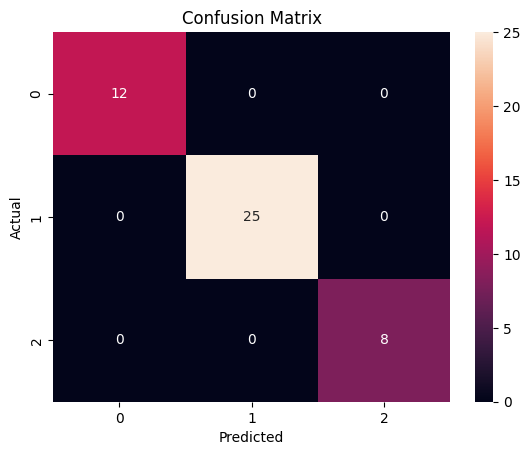

In [23]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

* Precision(P): $\frac{TP}{TP + FP}$
* Recall(R): $\frac{TP}{TP + FN}$
* F1: $\frac{2PR}{P + R}$
* Accuracy: $\frac{TP + TN}{TP + TN + FP + FN}$

In [24]:
p = 0.1
r = 0.79
print((p+r) / 2)
print((2 * p * r) / (p + r))

0.445
0.1775280898876405


In [25]:
tp = 12
fp = 4
fn = 0 + 0
print(f'Precision: {tp / (tp + fp)}')
print(f'Recall: {tp / (tp + fn)}')

Precision: 0.75
Recall: 1.0


# Hyper Parameters Tuning

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn_parameters = {
    'n_neighbors' : [3, 5, 7, 11, 15, 25, 41],
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3, 5, 25, 7, 6, 4, 8]
}

In [28]:
7 * 2 * 9

126

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=knn_parameters, n_jobs=-1)

In [31]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 11, 15, 25, 41],
                         'p': [1, 2, 3, 5, 25, 7, 6, 4, 8],
                         'weights': ['uniform', 'distance']})

In [32]:
grid_search.best_score_

0.9700854700854702

In [33]:
grid_search.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}

In [34]:
best_knn = grid_search.best_estimator_

In [35]:
import joblib

In [36]:
joblib.dump(best_knn, 'knn_best.pkl')

['knn_best.pkl']

In [37]:
loaded_knn = joblib.load('knn_best.pkl')

In [38]:
y_pred = loaded_knn.predict(X_test)

In [39]:
y_pred

array([2, 1, 0, 1, 2, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 0, 2,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 0,
       2])

In [40]:
y_test

array([2, 1, 0, 1, 2, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 0, 2,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0,
       2])